### 1. 단순선형회귀 
#### RM변수와 LSTAT변수로 price를 예측하도록 각각 단순선형회귀분석 후 결과 분석

- Boston 주택 가격데이터 이용

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df["PRICE"] =pd.DataFrame(boston.target)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
price = boston_df[["PRICE"]]
rm = boston_df[['RM']]
lstat = boston_df[['LSTAT']]

In [5]:
import statsmodels.api as sm

rm1 = sm.add_constant(rm)
lstat1 = sm.add_constant(lstat)

model1 = sm.OLS(price,rm1)
fitted_model1 = model1.fit()
fitted_model1.summary()


model2 = sm.OLS(price,lstat1)
fitted_model2 = model2.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           5.08e-88
Time:                        17:36:06   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
pred1 = fitted_model1.predict(rm1)

pred2 = fitted_model2.predict(lstat1)

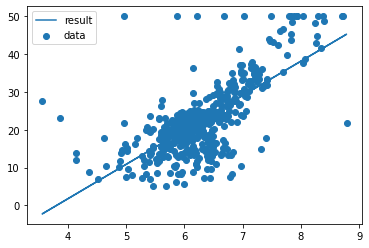

In [8]:
import matplotlib.pyplot as plt
plt.scatter(rm,price,label="data")
plt.plot(rm,pred1,label="result")
plt.legend()
plt.show()

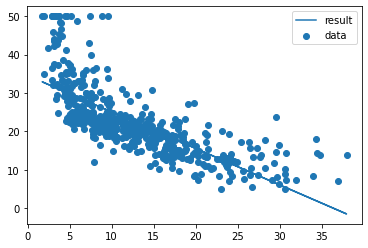

In [11]:
import matplotlib.pyplot as plt
plt.scatter(lstat,price,label="data")
plt.plot(lstat,pred2,label="result")
plt.legend()
plt.show()

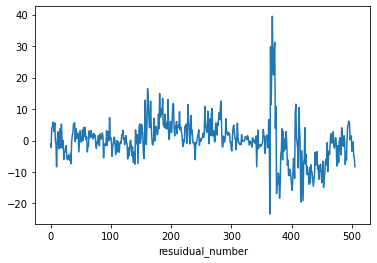

In [13]:
fitted_model1.resid.plot()
plt.xlabel("resuidual_number")
plt.show()

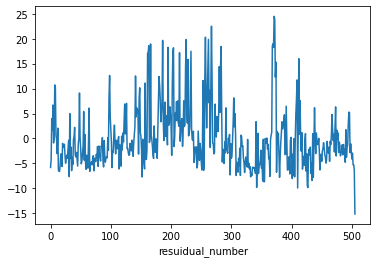

In [14]:
fitted_model2.resid.plot()
plt.xlabel("resuidual_number")
plt.show()

###  2. 다중선형회귀와 단순선형회귀계수 비교
#### CRIM, RM, LSTAT 세개 변수로 다중선형회귀 적합한 결과와  각각의 변수를 단순선형회귀 적합한 모델의 회귀계수를 비교 

- Boston 주택 가격데이터 이용

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [ ]:
boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df["PRICE"] =pd.DataFrame(boston.target)
boston_df.head()

In [15]:
crim  = boston_df[["CRIM"]]
rm = boston_df[['RM']]
lstat = boston_df[['LSTAT']]

x_data = boston_df[["CRIM","RM","LSTAT"]]

price = boston_df[["PRICE"]]


In [16]:
crim1 = sm.add_constant(crim)
rm1 = sm.add_constant(rm)
lstat1 = sm.add_constant(lstat)

In [17]:
x_data1 = sm.add_constant(x_data)

In [19]:

model1 = sm.OLS(price,crim1)
fitted_model1 = model1.fit()
fitted_model1.summary()

model2 = sm.OLS(price,rm1)
fitted_model2 = model2.fit()
fitted_model2.summary()

model3 = sm.OLS(price,lstat1)
fitted_model3 = model3.fit()
fitted_model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           5.08e-88
Time:                        17:51:53   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
multi_model = sm.OLS(price,x_data1)
fitted_multi_model = multi_model.fit()

In [22]:
print(fitted_model1.params)
print(fitted_model2.params)
print(fitted_model3.params)

const    24.033106
CRIM     -0.415190
dtype: float64
const   -34.670621
RM        9.102109
dtype: float64
const    34.553841
LSTAT    -0.950049
dtype: float64


In [23]:
print(fitted_multi_model.params)

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


### 3. 다중공선성과 회귀모델 성능 확인
####  (1) CRIM, RM, LSTAT, B, TAX, AGE, ZN, NOX, INDUS 변수로 데이터를 분할 하여 회귀 모형 생성 후 성능확인
#### (2) 다중공선성을 확인하여 변수 제거 후 모형의 성능 높이기

- Boston 주택 가격데이터 이용
